Dado el siguiente laberinto en donde la calda inicial esta marcada en color 
rojo y la final en color verde. Encontrar la ruta más corta por medio del algoritmo de búsqueda informada A*

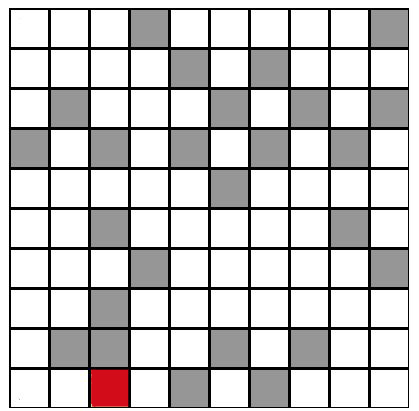


So...
Primero vamos a crear el algoritmo a base de nodos.

In [ ]:
#En Python3 la librería se llama queue perooo para Python2 la librería es Queue
import queue as Queue

"""
  Construye un gráfico de nodos y aristas.
  Incluidos los obstáculos que no se pueden atravesar.
"""
class Graph:
  __all_nodes = []
  __movement_costs = {}
  
  """
    Graph with obstacles; movement only permitted around them.
    obstacles is an array of x,y coords, eg: [(0, 1), (0, 3)]
    obstacles is nullable, if you don't provide it no obstacles are placed
  """
  def __init__(self, xSize, ySize, obstacles = []):
    self.__constructGrid(xSize, ySize)
    for obstacle in obstacles:
      self.__all_nodes.remove(obstacle)
    
  """
    Constructs a grid of nodes using the provided x and y size.
  """
  def __constructGrid(self, xSize, ySize):
    for x in range(xSize):
      for y in range(ySize):
	      self.__all_nodes.append((x, y))
	      self.__movement_costs[(x, y)] = 1 # Default all costs to 1
  
  """
    Finds out all the edges for each node based on whether they can be moved into
  """
  def getNeighbours(self, node):
    # I can move up, down, left or right, but not diagonally
    directions = [(1 ,0), (0, 1), (-1, 0), (0, -1)]
    neighbours = []
    for direction in directions:
      neighbour = (node[0] + direction[0], node[1] + direction[1])
      if neighbour in self.__all_nodes:
	      neighbours.append(neighbour)
    return neighbours
  
  """
    Gets the current cost of the node, the higher the cost the less efficient 
    it is to move through that node 
  """
  def getCost(self, node):
    return self.__movement_costs[node]
  
  """
    Sets the current cost of the node, the higher the cost the less efficient 
    it is to move through that node
  """
  def setCost(self, node, newCost):
    self.__movement_costs[node] = newCost
  
  """
    Defines how close 2 nodes are together
  """
  def heuristic(self, a, b):
    # Manhattan distance on a square grid
    return abs(a[0] - b[0]) + abs(a[1] - b[1])




xSize = 10
ySize = 10

obstacles = [(0,3),(0,9),
             (1,4), (1,6), 
	          (2,1), (2,5),(2,7),(2,9),
	          (3,0), (3,2), (3,4), (3,6),(3,8),
	          (4,5),
            (5,2), (5,8),
             (6,3), (6,9),
             (7,2),
             (8,1), (8,2), (8,5), (8,7),
             (9,4), (9,6),]

print("Tenemos un plano de 10x10, las siguientes coordenadas están ocupadas por obstáculos, por favor, elige una que no esté en la siguiente lista:\n")
for x in range(xSize):
  for y in range(ySize):
    if (x,y) in obstacles:
      print("("+str(x)+","+str(y)+")")

print("\n El punto inicial está en (9,2).")

xnodeGoal = input("\n Dame la X para el punto destino ")
ynodeGoal = input("\n Dame la Y para el punto destino ")

xxnodeGoal = int(xnodeGoal)
yynodeGoal = int(ynodeGoal)



graph = Graph(xSize, ySize, obstacles)

higherCostingNodes = []

for node in higherCostingNodes:
  graph.setCost(node, 5)




startNode = (9,2)
goalNode = (xxnodeGoal,yynodeGoal)

frontier = Queue.PriorityQueue()
frontier.put(startNode, 0)
came_from = {}
cost_so_far = {}
came_from[startNode] = None #Python version of "null"
cost_so_far[startNode] = 0



# Construct a map of all possible paths for the startNode across the map
while not frontier.empty():
  current = frontier.get() # Get instead of peek, dequeues the item

  for neighbour in graph.getNeighbours(current):
    new_cost = cost_so_far[current] + graph.getCost(neighbour)
    if neighbour not in cost_so_far or new_cost < cost_so_far[neighbour]:
      cost_so_far[neighbour] = new_cost
      priority = new_cost + graph.heuristic(goalNode, neighbour) 
      frontier.put(neighbour, priority)
      came_from[neighbour] = current

# Crea el camino entre el startNode y goalNode
currentNode = goalNode
path = [currentNode]
while currentNode != startNode:
  currentNode = came_from[currentNode]
  path.append(currentNode)


# Aquí visualizamos los resultados :3
resultingGrid = "\n"

resultingGrid += " O : representa el punto de origen\n D : Representa el punto de Destino\n # : Representan los obstaculos\n---: Representa el mejor camino encontrado por el algoritmo\n"
resultingGrid += " . : Representa los cuadritos que no fueron considerados en el camino\n"
resultingGrid += "\n\n"

for x in range(xSize):
  for y in range(ySize):
    if (x,y) in obstacles:
      resultingGrid += " # "
    elif (x,y) == startNode:
      resultingGrid += " O "
    elif (x,y) == goalNode:
      resultingGrid += " D "
    elif (x,y) in path:
      resultingGrid += "---"
    elif (x,y) in higherCostingNodes:
      resultingGrid += "***"
    else:
      resultingGrid += " . "
  resultingGrid +="\n\n"

print(resultingGrid)

Tenemos un plano de 10x10, las siguientes coordenadas están ocupadas por obstáculos, por favor, elige una que no esté en la siguiente lista:

(0,3)
(0,9)
(1,4)
(1,6)
(2,1)
(2,5)
(2,7)
(2,9)
(3,0)
(3,2)
(3,4)
(3,6)
(3,8)
(4,5)
(5,2)
(5,8)
(6,3)
(6,9)
(7,2)
(8,1)
(8,2)
(8,5)
(8,7)
(9,4)
(9,6)

 El punto inicial está en (9,2).

 Dame la X para el punto destino 7

 Dame la Y para el punto destino 3

 O : representa el punto de origen
 D : Representa el punto de Destino
 # : Representan los obstaculos
---: Representa el mejor camino encontrado por el algoritmo
 . : Representa los cuadritos que no fueron considerados en el camino


 .  .  .  #  .  .  .  .  .  # 

 .  .  .  .  #  .  #  .  .  . 

 .  #  .  .  .  #  .  #  .  # 

 #  .  #  .  #  .  #  .  #  . 

 .  .  .  .  .  #  .  .  .  . 

 .  .  #  .  .  .  .  .  #  . 

 .  .  .  #  .  .  .  .  .  # 

 .  .  #  D  .  .  .  .  .  . 

 .  #  # --- .  #  .  #  .  . 

 .  .  O --- #  .  #  .  .  . 


